In [1]:
import sys
sys.path.append('..')

# Python 🐍

----

## Environment Setup

We'll be using **Python** during these classes. Instructions on how to install all the required packages can be found in the README file on the main page of this repository. We'll be using **Jupyter** notebooks as a coding environment. To run a notebook you need to:

1. Activate the created conda environment: `conda activate mldd23`
2. Run the Jupyter server using the command: `jupyter notebook`
3. The notebook should start in your browser automatically. If that doesn't happen, you should type `localhost:8888` into your browser (8888 is the default port, but you can check the exact port in the console output when the notebook is running)

An alternative for running notebooks on your computer is using [**Colab**](https://colab.research.google.com/). In this case all the results are saved to your Google Drive. An obvious downside is that many of the chemistry-related packages will be difficult to install in Colab.

## For Beginners

The recommended Python courses:

- JU course: ["Python for data processing"](https://github.com/gmum/python-for-data-processing)
- JU course: ["Effective Python"](https://github.com/kmisztal/effective_python)
- MIT course: ["Introduction to Computer Science and Programming in Python"](https://ocw.mit.edu/courses/6-0001-introduction-to-computer-science-and-programming-in-python-fall-2016/)
- Coursera: ["Python Basics"](https://www.coursera.org/learn/python-basics) 
- Coursera: ["Crash Course on Python"](https://www.coursera.org/learn/python-crash-course)
- Interactive course: ["100 Days of Code"](https://replit.com/learn/100-days-of-python)

# Machine Learning in a Nutshell

---

Machine learning is a branch of **artificial intelligence**. Machine learning methods are learning from the available data to give more accurate predictions. During this course we'll be working mostly with **supervised learning**, in which all data has a label assigned to it. For example, in toxicity prediction, the model will be trained using a compound representation and its binary toxicity label (toxic or non-toxic). If the labels are discrete, i.e. they are classes or categories, we're talking about **classification methods**. If the labels are continuous (e.g. solubility of a compound can be expressed in grams per liter of the solvent), we're talking about **regression methods**.

We will also touch on the topic of **unsupervised learning** when the labels are unknown, so we'll be trying to discover relationships in the data without knowing ground truth assignments to any of the classes. The most typical example of unsupervised learning in chemistry is **generative modeling**. Such model takes as an input a set of molecules and tries to generate new molecules that are similar to the provided ones. Thus, the model learns features of the training set and similarity between compounds. Another example of an unsupervised method is **clustering** which aims at extracting groups of similar objects.

Finally, there is another class of methods that doesn't require any input data, but rather it creates new data on its own by interacting with the (virtual) environment. These algorithms are known as **reinforcement learning**. In drug design, these methods are especially useful, as we want to optimize the chemical properties of the generated drug candidates.

## Machine Learning Materials

The recommended ML courses:

- JU course: ["Neural Networks"](https://github.com/gmum/nn2019)
- JU course: ["Machine Learning"](https://github.com/gmum/ml2017)
- Coursera: ["Machine Learning"](https://www.coursera.org/learn/machine-learning)
- Coursera: ["Deep Learning"](https://www.coursera.org/specializations/deep-learning)

## Example Code for Training Linear Regression

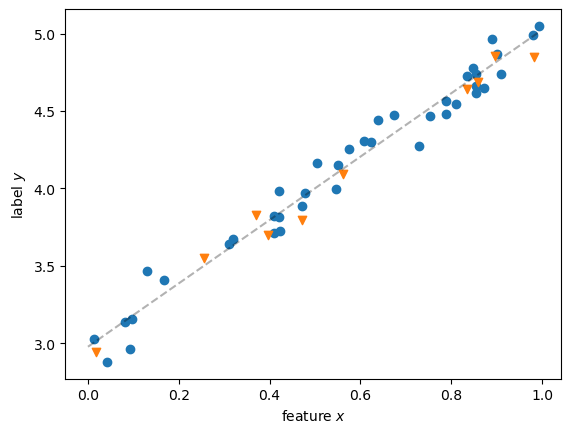

In [14]:
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import numpy as np


# generate random data
x = np.random.uniform(0., 1., size=50)
y = 2 * x + 3 + np.random.normal(scale=0.1, size=50)

# split the data into the training and testing sets
x_train = x[:40]
y_train = y[:40]

x_test = x[40:]
y_test = y[40:]

# create a linear regression model and train it using the training data
reg = LinearRegression()
reg.fit(x_train.reshape(-1, 1), y_train)

# construct the line corresponding to the trained linear model
x_range = np.arange(0., 1., 0.01)
y_pred = reg.predict(x_range.reshape(-1, 1))

# plot everything
plt.plot(x_range, y_pred, c='k', ls='--', alpha=0.3)
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, marker='v')
plt.xlabel('feature $x$')
plt.ylabel('label $y$')
plt.show()

# Molecular Represenations

---

Chemical compounds are not easily understandable for computers. They are highly structured and multidimensional, so it poses a challenge to encode them in the bits of a computer drive. There are many numerical representations of molecules, each of them tailored for a different purpose. Two of the most standard molecular representations are described below. The first one is most often used to store chemical compound datasets on a computer. The second one can be used by classical machine learning models to learn property prediction tasks.

## SMILES

Simplified molecular-input line-entry system (SMILES) is a textual representation of a compound. It is the most basic representation for storing molecules in the databases due to the following two reasons:

1. text can be easily saved in CSV files,
2. this representation can be used to deterministically identify a compound (and to some extent also its spatial arrangement).

Of course there are some drawbacks of this representation. One is that the inverse transformation can be ambiguous because one compound can be represented using multiple different SIMLES strings. Also, the linear representation doesn't capture well the complexity of chemical structures.

### Simplified Procedure of SMILES Construction

![smiles](https://upload.wikimedia.org/wikipedia/commons/0/00/SMILES.png)

1. Prepare the structural formula of a compound;
2. Cut all the rings to create a connected tree of atoms;
3. Select any starting atom and write down all the bonds and atoms as you travel across the compound (DFS order);
4. Alternative paths should be in parentheses to mark the branches;
5. Atoms near the ring cuts should be marked with matching indices (watch out for the index collisions).

The above algorithm can be extended to include ordering rules, e.g. "find the longest path in the structural formula and use it as the main path", and make the SMILES representation deterministic (so called **canonical SMILES**).

In SMILES, you can also encode the spatial geometry of a compound. The SMILES strings listed below can be copy-pasted to the input below to see these compounds in 3D. Let's see how these well-known drugs are presented in the 3D space.

#### Popular drugs 

1. Ibuprofen: `CC(C)CC1=CC=C(C=C1)C(C)C(=O)O` lub `CC(C)Cc1ccc(cc1)C(C)C(=O)O`
2. Penicillin: `CC1(C(N2C(S1)C(C2=O)NC(=O)CC3=CC=CC=C3)C(=O)O)C` lub `CC1(C(N2C(S1)C(C2=O)NC(=O)CC1=CC=CC=C1)C(=O)O)C`
3. Fluoxetine: `CNCCC(C1=CC=CC=C1)OC2=CC=C(C=C2)C(F)(F)F`
4. THC: `CCCCCC1=CC2=C(C3C=C(CCC3C(O2)(C)C)C)C(=C1)O`

#### SMILES and the spatial arrangement of atoms

The spatial arrangement is very important when designing drugs. Sometimes two compounds with the same structural formula (not considering the geometry) have completely different biological effects. Thalidomide is an infamous example that was designed as a painkiller and antiemetic, but its mirror-image form turned out to be teratogenic.

(R)-talidomid: `C1CC(=O)NC(=O)[C@@H]1N2C(=O)C3=CC=CC=C3C2=O`

(S)-talidomid: `C1CC(=O)NC(=O)[C@H]1N2C(=O)C3=CC=CC=C3C2=O`

#### Similariy of the compounds having similar effects

Oftentimes compounds inducing similar effects also have a similar structural formula and spatial arrangement of atoms. Many drugs were developed by modifying the substances that were known to have some therapeutic effects to make them more potent. The following three substances are opioids, and the first two of them are natural (extracted from opium poppy), and the third one is a narcotic obtained synthetically.

Do you see any difference between these molecules?

morphine: `CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)O)O[C@H]3[C@H](C=C4)O`

codeine: `COC1=C(O2)C3=C(C=C1)C[C@@H]4[C@]5([H])C=C[C@H](O)[C@H]2[C@@]53CCN4C`

heroine: `CC(=O)OC1C=CC2C3CC4=C5C2(C1OC5=C(C=C4)OC(=O)C)CCN3C`

In [17]:
import py3Dmol
from rdkit import Chem
from rdkit.Chem import AllChem

from ipywidgets import interact


@interact
def show_molecule(smiles=''):
    if not smiles:
        return
    mol = Chem.MolFromSmiles(smiles)
    display(mol)
    if not mol:
        return
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol)
    AllChem.MMFFOptimizeMolecule(mol)
    mblock = Chem.MolToMolBlock(mol, kekulize=False)

    view = py3Dmol.view(width=800, height=500)
    view.addModel(Chem.MolToMolBlock(mol, kekulize=True), 'mol')
    view.setStyle({'model': -1}, {"stick": {'color': 'white', 'radius': 0.15}, "sphere": {'radius': .4}})
    view.zoomTo({'model': -1})
    view.show()

## Molecular Fingerprints

The textual representation is not perfect for use in machine learning although the advances in natural language processing enabled the effective use of this representation as well. The linearization of the compound makes the analysis of the local features (e.g. atom neighborhood) more challenging. 

An alternative approach is to represent a compound as a molecular fingerprint. The compound is converted to a numerical vector that encode selected substructures present in the compound. The set of substructures can be pre-defined as in Molecular ACCess System (**MACCS**) which consists of 166 bits associated with keys describing specific pattern in the molecular structures. (the patterns can be found [here](https://github.com/rdkit/rdkit/blob/master/rdkit/Chem/MACCSkeys.py))

![maccs](https://oi.readthedocs.io/en/latest/_images/maccs.png)

More flexible fingerprints encode all the local neighborhoods in a molecular graph. For example, Extended Connectivity FingerPrint (**ECFP**) uses the circular neighbourhood of an atom with of a given radius. For each atom in the molecule, all atoms that are not further than the radius are found. These neighborhoods are encoded into an integer taking into account the atom types (element symbol), they are hashed and mapped to the correct position in the fingerprint vector. In this case, as opposed to the MACCS keys, no atom is omitted in the encoding.

![ecfp](https://docs.chemaxon.com/display/docs/images/download/attachments/1806333/ecfp_generation.png)

You can easily notice that the downside of this representation is that the original compound cannot be decoded from the fingerprint. It can happen that two compounds are encoded in the same way, e.g. due to a hash collision when the fingerprint is too short. However, this representation gives excellent results in machine learning, outperforming even complex molecular descriptors (initially compounds were represented using values derived from compounds theoretically or experimentally).

## Classical Machine Learning Models


### Linear Regression / Logistic Regression

`from sklearn.linear_model import LinearRegression`

`from sklearn.linear_model import LogisticRegression`

[Nice example of polynomial features!](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py)

![linear](https://static.javatpoint.com/tutorial/machine-learning/images/linear-regression-in-machine-learning.png)
![logistic](https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png)

### Random Forest

`from sklearn.linear_model import LinearRegression`

`from sklearn.ensemble import RandomForestRegressor`

![rf](https://www.tibco.com/sites/tibco/files/media_entity/2021-05/random-forest-diagram.svg)

### SVM

`from sklearn.svm import SVC`

`from sklearn.svm import SVR`

![svm](https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/300px-SVM_margin.png)

## Programming Exercise

The code below can be used to load the data and contains the model training template. The goal is to train the best possible model that predicts two molecular properties. The first dataset is AqSolDB, which is a dataset of aqueous solubility. This is important for drug absorption in the organism. The second dataset is Blood-Brain Barrier Permeability (BBBP), which is a key property of compounds that need to impact the central nervous system.

The datasets have different types of labels: AqSolDB is a regression task (continuous labels) and BBBP is a binary classification task (can or cannot penetrate BBB).

In [3]:
import numpy as np
from tdc.single_pred.adme import ADME
from tdc import Evaluator
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors, DataStructs, rdMolDescriptors, rdmolops, FragmentMatcher, Lipinski, Crippen
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

class Featurizer:
    def __init__(self, y_column, smiles_col='Drug', **kwargs):
        self.y_column = y_column
        self.smiles_col = smiles_col
        self.__dict__.update(kwargs)
    
    def __call__(self, df):
        raise NotImplementedError()

class ECFPFeaturizer(Featurizer):
    def __init__(self, y_column, radius=2, length=1024, **kwargs):
        self.radius = radius
        self.length = length
        super().__init__(y_column, **kwargs)
    def __call__(self, df):
        fingerprints = []
        labels = []
        for i, row in df.iterrows():
            y = row[self.y_column]
            smiles = row[self.smiles_col]
            mol = Chem.MolFromSmiles(smiles)
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, self.radius, nBits=self.length)
            fingerprints.append(fp)
            labels.append(y)
        fingerprints = np.array(fingerprints)
        labels = np.array(labels)
        return fingerprints, labels

class HRSolFeaturizer(Featurizer):
    def __init__(self, y_column, charge_thresh, **kwargs):
        self.charge_thresh = charge_thresh
        super().__init__(y_column, **kwargs)    
    
    def __call__(self, df):
        features = []
        labels = []
        for i, row in df.iterrows():
            y = row[self.y_column]
            smiles = row[self.smiles_col]
            mol = Chem.MolFromSmiles(smiles)
            fp = Chem.rdMolDescriptors.GetMACCSKeysFingerprint(mol)
            AllChem.ComputeGasteigerCharges(mol)
            fp_arr = np.zeros((0,), dtype=int)
            DataStructs.ConvertToNumpyArray(fp, fp_arr)

            neg_charges = 0
            pos_charges = 0
            for atom in mol.GetAtoms():
                charge = atom.GetDoubleProp('_GasteigerCharge')
                if np.isnan(charge) or np.isinf(charge):
                    charge = 0.0
                elif charge <= -self.charge_thresh:
                    neg_charges += charge
                elif charge >= self.charge_thresh:
                    pos_charges += charge
            
            descriptors = np.array([
            Crippen.MolLogP(mol),
            rdMolDescriptors.CalcExactMolWt(mol),
            rdMolDescriptors.CalcLabuteASA(mol),
            rdMolDescriptors.CalcTPSA(mol),
            Lipinski.NHOHCount(mol),
            Lipinski.FractionCSP3(mol),
            Lipinski.NOCount(mol),
            neg_charges, pos_charges,
            Lipinski.NumAromaticCarbocycles(mol),
            Lipinski.NumAromaticHeterocycles(mol),
            Lipinski.NumAromaticRings(mol),
            Lipinski.NumRotatableBonds(mol)
            ])
            
            fp_arr = np.concatenate((fp_arr, descriptors), axis=None)
            
            labels.append(y)
            features.append(fp_arr)
            
        labels = np.array(labels)
        features = np.array(features)
        return features, labels 
    
def train(X_train, y_train):
    
    
    from sklearn.ensemble import RandomForestRegressor
    
    model = RandomForestRegressor(bootstrap=False, max_depth=None, max_features='sqrt', 
                                  min_samples_leaf=1, min_samples_split=2, n_estimators=170, random_state=42)

    model.fit(X_train, y_train)
    return model

def predict(model, X_test):
    sol = model.predict(X_test)
    return sol

data = ADME('Solubility_AqSolDB')
split = data.get_split()

rmse = Evaluator(name = 'RMSE')
mae = Evaluator(name = 'MAE')
r_squared = Evaluator(name = 'R2')

'''
#brute-force checking for best HRBBBFeaturizer "charge_thresh" value on validation set:
print("Optimizing charge_thresh")

i_arr = []
RMSE_arr = []

for i in np.arange(0,1,0.01):
    featurizer = HRSolFeaturizer(y_column='Y', charge_thresh=round(i,2))
    X_train, y_train = featurizer(split['train'])
    X_valid, y_valid = featurizer(split['valid'])
    model = train(X_train, y_train)
    y_pred = predict(model, X_valid)
    rmse_score = rmse(y_valid, y_pred)
    i_arr.append(round(i,2))
    RMSE_arr.append(rmse_score)
    print(f'i = {round(i,2)} RMSE = {rmse_score}')
    
thresh = i_arr[np.argmin(RMSE_arr)]
print('Optimal charge_thresh =', thresh)
'''

thresh = 0.43 # as calculated above
featurizer = HRSolFeaturizer(y_column='Y', charge_thresh=thresh)

X_train, y_train = featurizer(split['train'])
X_test, y_test = featurizer(split['test'])

model = train(X_train, y_train)
y_pred = predict(model, X_test)

rmse_score = rmse(y_test, y_pred)
mae_score = mae(y_test, y_pred)
r2_score = r_squared(y_test, y_pred)

print(f'My featurizer: RMSE, MAE, R2 = {rmse_score}, {mae_score}, {r2_score}')

Found local copy...
Loading...
Done!


My featurizer: RMSE, MAE, R2 = 0.9869205307826173, 0.6741118674390398, 0.8205144584197518


### Solubility

In [ ]:
print('The most soluble compounds in the dataset:')
smiles_list = split['train'].sort_values('Y', ascending=False).iloc[:10].Drug
display(Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(smiles) for smiles in smiles_list], molsPerRow=5))
print('The least soluble compounds in the dataset:')
smiles_list = split['train'].sort_values('Y', ascending=True).iloc[:10].Drug
display(Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(smiles) for smiles in smiles_list], molsPerRow=5))

### BBBP

In [2]:
import numpy as np
from tdc.single_pred.adme import ADME
from tdc import Evaluator
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors, DataStructs, rdMolDescriptors, rdmolops, FragmentMatcher
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')
#np.set_printoptions(threshold=sys.maxsize)

class Featurizer:
    def __init__(self, y_column, smiles_col='Drug', **kwargs):
        self.y_column = y_column
        self.smiles_col = smiles_col
        self.__dict__.update(kwargs)
    
    def __call__(self, df):
        raise NotImplementedError()

class HRBBBFeaturizer(Featurizer):
    def __init__(self, y_column, charge_thresh, **kwargs):
        self.charge_thresh = charge_thresh
        super().__init__(y_column, **kwargs)    
    
    def __call__(self, df):
        features = []
        labels = []
        for i, row in df.iterrows():
            y = row[self.y_column]
            smiles = row[self.smiles_col]
            mol = Chem.MolFromSmiles(smiles)
            fp = Chem.rdMolDescriptors.GetMACCSKeysFingerprint(mol)
            AllChem.ComputeGasteigerCharges(mol)
            fp_arr = np.zeros((0,), dtype=int)
            DataStructs.ConvertToNumpyArray(fp, fp_arr)
            
            neg_charges = 0
            pos_charges = 0
            for atom in mol.GetAtoms():
                charge = atom.GetDoubleProp('_GasteigerCharge')
                if np.isnan(charge) or np.isinf(charge):
                    charge = 0.0
                elif charge <= -self.charge_thresh:
                    neg_charges += charge
                elif charge >= self.charge_thresh:
                    pos_charges += charge
            
            descriptors = np.array([
            rdMolDescriptors.CalcExactMolWt(mol),
            rdMolDescriptors.CalcLabuteASA(mol),
            rdMolDescriptors.CalcTPSA(mol),
            rdMolDescriptors.CalcFractionCSP3(mol),
            neg_charges, pos_charges,
            rdMolDescriptors.CalcNumHeteroatoms(mol),
            rdMolDescriptors.CalcNumAromaticRings(mol)])
            
            fp_arr = np.concatenate((descriptors, fp_arr), axis=None)
            labels.append(y)
            features.append(fp_arr)
            
        labels = np.array(labels)
        features = np.array(features)
        return features, labels   

def train(X_train, y_train):
    
    
    from sklearn.ensemble import RandomForestClassifier
    
    model = RandomForestClassifier(random_state=42, n_estimators=305, min_samples_split=5, 
                                   min_samples_leaf=2, max_features='sqrt', max_depth=30, bootstrap=False)
    model.fit(X_train, y_train)
    return model


def predict(model, X_test):
    
    BBB = model.predict_proba(X_test)[:,1]
    return BBB

data = ADME('bbb_martins')
split = data.get_split(method='scaffold')

roc_auc = Evaluator(name = 'ROC AUC')
accuracy = Evaluator(name = 'Accuracy')


''''
#brute-force checking for best HRBBBFeaturizer "charge_thresh" value on validation set:
print("Optimizing charge_thresh")

ROC_arr = []
i_arr = []

for i in np.arange(0,1,0.02):
    featurizer = HRBBBFeaturizer(y_column='Y', charge_thresh=round(i,2))
    X_train, y_train = featurizer(split['train'])
    X_valid, y_valid = featurizer(split['valid'])
    model = train(X_train, y_train)
    y_pred = predict(model, X_valid)
    roc = roc_auc(y_valid, y_pred)
    i_arr.append(round(i,2))
    ROC_arr.append(roc)
    print(f'i = {round(i,2)} ROC_AUC = {roc}')

thresh = i_arr[np.argmax(ROC_arr)]
print('Optimal charge_thresh =', thresh)
'''
thresh = 0.64 #as calculated above

featurizer = HRBBBFeaturizer(y_column='Y', charge_thresh=thresh)
X_train, y_train = featurizer(split['train'])
X_test, y_test = featurizer(split['test'])

model = train(X_train, y_train)
y_pred = predict(model, X_test)

roc = roc_auc(y_test, y_pred)
acc = accuracy(y_test, y_pred > 0.5)
print(f'ROC AUC, accuracy = {roc}, {acc}')

Downloading...
100%|██████████| 138k/138k [00:00<00:00, 565kiB/s] 
Loading...
Done!
100%|██████████| 2030/2030 [00:01<00:00, 1030.50it/s]


ROC AUC, accuracy = 0.9162367104440275, 0.896551724137931


###